# Assignment 1

First we need to import a few modules, execute the cell below:

In [5]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [61]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    c=numpy.cos(x)
    return c

You can use the following cell to check that your code works for scalar arguments:

In [62]:
assert numpy.isclose(f(0.5),0.87758256189)

NameError: name 'cos' is not defined

Make sure your code also works with a numpy array:

In [11]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [34]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    df=-numpy.sin(x)
    return df

In [35]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [36]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [37]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    df=(-f(x-dx)+f(x))/dx
    return df

In [38]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


(Text(0.5,0,'x'), Text(0,0.5,'df_dx - df_dx_analytical'))

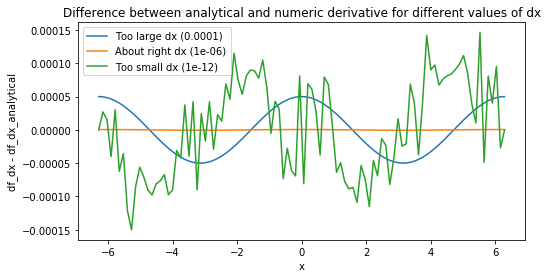

In [60]:
#range of x
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
#values of dx
dx_big=1e-4
dx_right=1e-6
dx_small=1e-12
#calculate derivatives
df_dx_big = backward_difference(f, xs, dx_big)
df_dx_right = backward_difference(f, xs, dx_right)
df_dx_small = backward_difference(f, xs, dx_small)
df_dx_analytical = df_analytic(xs)
#instantiate plots
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_big - df_dx_analytical)
plt.plot(xs, df_dx_right - df_dx_analytical)
plt.plot(xs, df_dx_small- df_dx_analytical)
#plot customization
plt.title('Difference between analytical and numeric derivative for different values of dx')
plt.legend([f'Too large dx ({dx_big})',f'About right dx ({dx_right})',f'Too small dx ({dx_small})'])
plt.xlabel('x'), plt.ylabel( 'df_dx - df_dx_analytical')

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


Too large dx: The Taylor approximation we use to derive the expression for the backwards numerical derivative is based on the assumption that dx is small enough (the approximation is totally correct in the limit dx=0). Due to this, if we choose a value of dx not small enough the approximation may not hold and the method looses accuracy.

Too small dx: The computer storage for each variable is not unlimited, so every variable will have a fixed number of significant digits. Therefore, if a too small value of dx is chosen, the several operations performed by the computer to calculate the value of the numerical derivative will result in round-off errors and random number assignment to 'free spaces'. Is because of this random nature that the green curve in the plot has that erratic and non-soft form.